# Sum of Gaussians grid cells

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from scipy.optimize import minimize
from scipy.signal import convolve2d

In [2]:
def closest_coord_index(coords, coord):
    return np.unravel_index(np.abs(coords - coord).sum(axis=-1).argmin(), coords.shape[:2])

def grid(coords, distributions):
    shape = coords.shape[:2]
    return np.asarray([dist.pdf(coords.reshape(-1, 2)).reshape(*shape)
                       for dist in distributions]).sum(axis=0) / len(distributions)

def f(x):
    a, b = x
    return sum([(a * s**-b - f)**2 for s, f in points])

points = [[0.03, 3],
          [0.003, 6],
          [0.0003, 12],
          [0.00003, 24]]

a, b = minimize(f, x0=(1, 1)).x

In [3]:
resolution = 400
MIN, MAX = -1, 1

x, y = np.linspace(MIN, MAX, resolution), np.linspace(MIN, MAX, resolution)
xx, yy = np.meshgrid(x, y)
coords = np.concatenate([xx[:,:,np.newaxis], yy[:,:,np.newaxis]], axis=-1)

In [4]:
# THIS CODE IS INCORRECT
frequencies = range(3, 8)
probs = list()
for freq in frequencies:
    size = (a / freq)**(b**-1)
    COV = np.eye(2) * size
    offsets = [0, 0.9 * (MAX - MIN) / (freq - 1) / 2] * (freq // 2) + ([0] if freq % 2 == 1 else [])
    
    for _ in range(30):
        x_phase, y_phase = np.random.normal(0, 1/freq, 2)
        mvns = [multivariate_normal(mean=[x + x_phase - offset, y + y_phase], cov=COV)
                for y, offset in zip(np.linspace(0.9 * MIN, 0.9 * MAX, freq), offsets)
                for x in np.linspace(0.9 * MIN, 0.9 * MAX + 2 * offset, int(freq + np.sign(offset)))]

        probs.append(grid(coords, mvns))
probs = np.asarray([p / p.max() for p in probs])

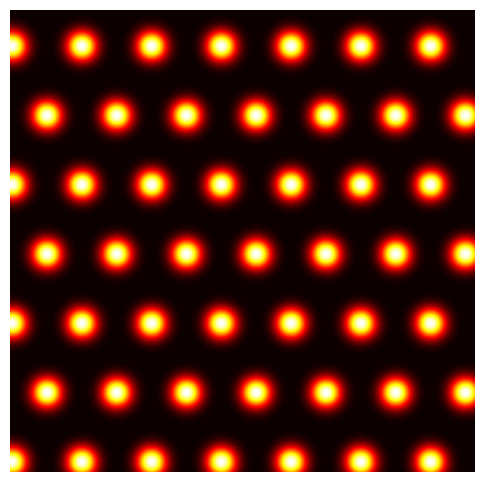

In [5]:
plt.figure(figsize=(6, 6))
plt.contourf(probs[-3], levels=100, cmap='hot')
plt.axis('off')
plt.show()